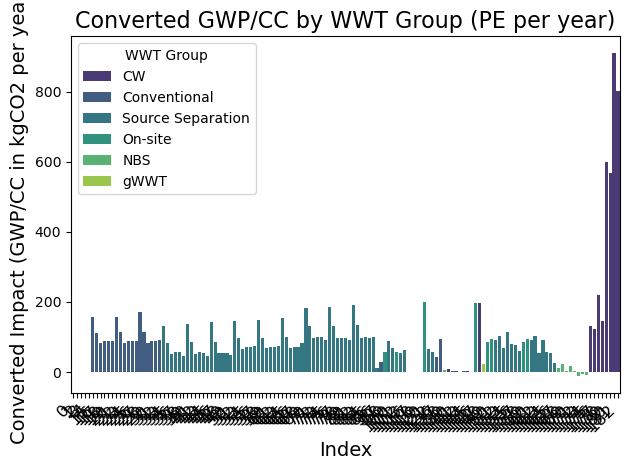

In [43]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

#get data and impact
file_path = "/Users/emilioes/Desktop/PhD/1/Meta-Lit Analysis.xlsx"
data = pd.read_excel(file_path, header=2)
data = data[data["Include in Paper"] == "Yes"]  
data = data.dropna(subset=["GWP/CC (kgCO2)"])
data["GWP/CC (kgCO2)"] = pd.to_numeric(data["GWP/CC (kgCO2)"], errors="coerce")  

#confert FUs to PE yr 
def convert_to_pe_per_year(fu_value, gwp_value):
    if isinstance(fu_value, str):  # Ensure we are working with string values
        fu_value = fu_value.strip()
        
        # Case 1: If FU is 'PR ye', return the GWP as it is (no conversion)
        if "PR ye" in fu_value:
            return gwp_value
        elif "PE" in fu_value:
            number_match = re.search(r"(\d+)\s*PE", fu_value)
            if number_match:
                number_before_pe = int(number_match.group(1))
                return gwp_value / number_before_pe
        elif "m3" in fu_value:
            return (gwp_value / 5) * 365
    return gwp_value

data["Converted_Impact"] = data.apply(lambda row: convert_to_pe_per_year(row["FU"], row["GWP/CC (kgCO2)"]), axis=1)

#plot
sns.barplot(x=data.index, y="Converted_Impact", data=data, hue="WWT Group", palette="viridis", dodge=False)

plt.title("Converted GWP/CC by WWT Group (PE per year)", fontsize=16)
plt.xlabel("Index", fontsize=14)  # We use the index on the x-axis, representing individual rows
plt.ylabel("Converted Impact (GWP/CC in kgCO2 per year)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/f_/84vnntp95_51q2241cz9_31w0000gq/T/ipykernel_63009/3264186355.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="WWT Group", y="Converted_Impact", data=data, jitter=True, palette="viridis", dodge=True)
/var/folders/f_/84vnntp95_51q2241cz9_31w0000gq/T/ipykernel_63009/3264186355.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='WWT Group', loc='upper right', bbox_to_anchor=(1.15, 1))


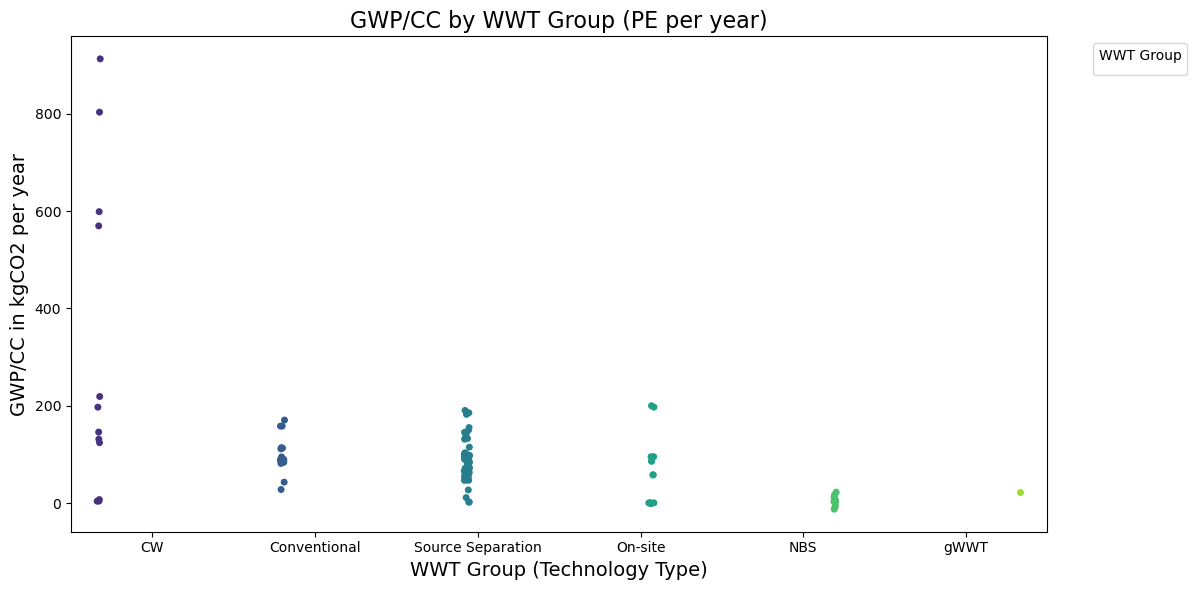

In [44]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

#get data and impact
file_path = "/Users/emilioes/Desktop/PhD/1/Meta-Lit Analysis.xlsx"
data = pd.read_excel(file_path, header=2)
data = data[data["Include in Paper"] == "Yes"]  
data = data.dropna(subset=["GWP/CC (kgCO2)"])
data["GWP/CC (kgCO2)"] = pd.to_numeric(data["GWP/CC (kgCO2)"], errors="coerce")  

#confert FUs to PE yr 
def convert_to_pe_per_year(fu_value, gwp_value):
    if isinstance(fu_value, str):  # Ensure we are working with string values
        fu_value = fu_value.strip()
        
        # Case 1: If FU is 'PR ye', return the GWP as it is (no conversion)
        if "PR ye" in fu_value:
            return gwp_value
        elif "PE" in fu_value:
            number_match = re.search(r"(\d+)\s*PE", fu_value)
            if number_match:
                number_before_pe = int(number_match.group(1))
                return gwp_value / number_before_pe
        elif "m3" in fu_value:
            return (gwp_value / 5) * 365
    return gwp_value

data["Converted_Impact"] = data.apply(lambda row: convert_to_pe_per_year(row["FU"], row["GWP/CC (kgCO2)"]), axis=1)

#type of plot
plt.figure(figsize=(12, 6))
sns.stripplot(x="WWT Group", y="Converted_Impact", data=data, jitter=True, palette="viridis", dodge=True)

#plot
plt.title("GWP/CC by WWT Group (PE per year)", fontsize=16)
plt.xlabel("WWT Group (Technology Type)", fontsize=14)
plt.ylabel("GWP/CC in kgCO2 per year", fontsize=14)
plt.legend(title='WWT Group', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


/var/folders/f_/84vnntp95_51q2241cz9_31w0000gq/T/ipykernel_63009/3518309525.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="WWT Group", y="Converted_Impact", data=data, jitter=True, palette="viridis", dodge=False, zorder=1)


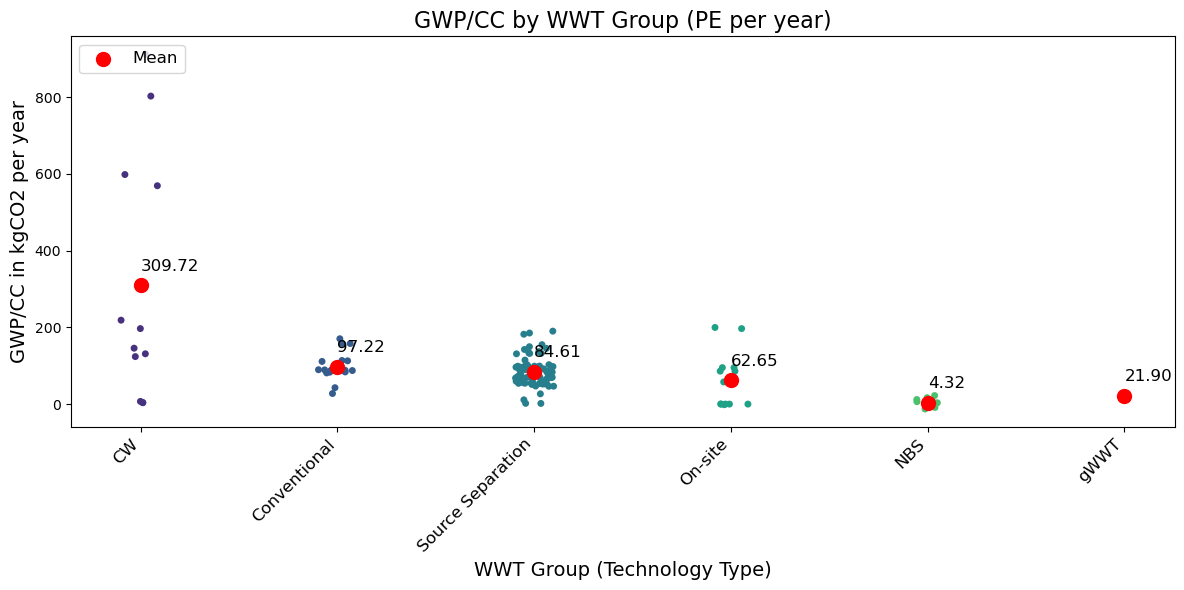

In [45]:
plt.figure(figsize=(12, 6))
sns.stripplot(x="WWT Group", y="Converted_Impact", data=data, jitter=True, palette="viridis", dodge=False, zorder=1)

#means
mean_values = data.groupby("WWT Group")["Converted_Impact"].mean()
for group, mean_val in mean_values.items():
    plt.scatter(group, mean_val, color='red', marker='o', s=100, zorder=2) 
    plt.text(group, mean_val + 30, f'{mean_val:.2f}', color='black', ha='left', va='bottom', fontsize=12, zorder=3)

plt.scatter([], [], color='red', marker='o', s=100, label="Mean")

plt.title("GWP/CC by WWT Group (PE per year)", fontsize=16)
plt.xlabel("WWT Group (Technology Type)", fontsize=14)
plt.ylabel("GWP/CC in kgCO2 per year", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)


plt.legend(loc="upper left", fontsize=12)

plt.tight_layout()


plt.show()

Get the top contributors

In [47]:
data["Converted_Impact"] = data.apply(lambda row: convert_to_pe_per_year(row["FU"], row["GWP/CC (kgCO2)"]), axis=1)
sorted_data = data.sort_values(by="Converted_Impact", ascending=False)


top_10 = sorted_data.head(10)


print("Top 10 IDs and WWT Group with highest Converted_Impact values:")
print(top_10[["ID", "WWT Group"]])
wwt_group_counts = data.groupby("WWT Group").size().reset_index(name="Total Count")
print(wwt_group_counts)




Top 10 IDs and WWT Group with highest Converted_Impact values:
     ID          WWT Group
181  22                 CW
182  22                 CW
179  22                 CW
180  22                 CW
177  22                 CW
120  14            On-site
147  19                 CW
146  19            On-site
81    5  Source Separation
75    5  Source Separation
           WWT Group  Total Count
0                 CW           17
1       Conventional           21
2                NBS            9
3            On-site           14
4  Source Separation           77
5               gWWT            1
